## Работа с файлами конфигурации

Документация на [ConfigParser](https://docs.python.org/3/library/configparser.html).

In [1]:
import configparser

In [5]:
config = configparser.ConfigParser()
config["DEFAULT"] = {
    "ServerAliveInterval": "45",
    "Compression": "yes",
    "CompressionLevel": "9",
}
config["bitbucket.org"] = {}
config["bitbucket.org"]["User"] = "hg"
config["topsecret.server.com"] = {}
topsecret = config["topsecret.server.com"]
topsecret["Port"] = "50022"
topsecret["Port2"] = "500221"
topsecret["ForwardX11"] = "no"
config["DEFAULT"]["ForwardX11"] = "yes"
with open("data/example.ini", "w") as configfile:
    config.write(configfile)

In [6]:
%cat data/example.ini
# ! rm data/example.ini

[DEFAULT]
serveraliveinterval = 45
compression = yes
compressionlevel = 9
forwardx11 = yes

[bitbucket.org]
user = hg

[topsecret.server.com]
port = 50022
port2 = 500221
forwardx11 = no



In [4]:
config = configparser.ConfigParser()
config.read('data/example.ini')
print("Sections:", config.sections())
print("If 'bitbucket.org' section is here:", 'bitbucket.org' in config)
print("If 'bitbucket.com' section is here:", 'bitbucket.com' in config)
print("bitbucket.org - User value:", config['bitbucket.org']['User'])
print("DEFAULT - Compression value:", config['DEFAULT']['Compression'])
topsecret = config['topsecret.server.com']
print("topsecret.server.com - ForwardX11", topsecret['ForwardX11'])
print("bitbucket.org keys and values")
for key in config['bitbucket.org']:
    print(f"    {key:20}: {config['bitbucket.org'][key]}")


Sections: ['bitbucket.org', 'topsecret.server.com']
If 'bitbucket.org' section is here: True
If 'bitbucket.com' section is here: False
bitbucket.org - User value: hg
DEFAULT - Compression value: yes
topsecret.server.com - ForwardX11 no
bitbucket.org keys and values
    user                : hg
    serveraliveinterval : 45
    compression         : yes
    compressionlevel    : 9
    forwardx11          : yes


In [5]:
config = configparser.ConfigParser()

#config.add_section("DEFAULT")
config.set("DEFAULT", "serveraliveinterval", "55")
config.set("DEFAULT", "compression", "yes")
config.set("DEFAULT", "compressionlevel", "9")
config.set("DEFAULT", "forwardx11", "yes")
config.add_section("bitbucket.org")
config.set("bitbucket.org", "user", "hg")
config.add_section("topsecret.server.com")
config.set("topsecret.server.com", "port", "500221")
config.set("topsecret.server.com", "forwardx11", "no")

with open("data/example.ini", "w") as config_file:
    config.write(config_file)
    
print("getting values: ", config.get("DEFAULT", "compression"),
      config.get("topsecret.server.com", "port"))

getting values:  yes 500221


In [6]:
%cat data/example.ini

[DEFAULT]
serveraliveinterval = 55
compression = yes
compressionlevel = 9
forwardx11 = yes

[bitbucket.org]
user = hg

[topsecret.server.com]
port = 500221
forwardx11 = no



Все значения должны иметь строковый тип.

In [7]:
config.set("DEFAULT", "serveraliveinterval", 55)

TypeError: option values must be strings

Секция DEFAULT должна указываться явно.

In [8]:
config.set("serveraliveinterval", "55")


TypeError: option values must be strings

Секция DEFAULT должна указываться явно даже при чтении.

In [9]:
config.get("serveraliveinterval", "55")


NoSectionError: No section: 'serveraliveinterval'

Вложенные секции разрешены.

Секции и значения можно удалять.

В документации указано ещё много разных возможностей для работы.

In [10]:
config.remove_option("DEFAULT", "serveraliveinterval")

True

## Ведение журнала (логов) средствами Python

В библиотеке [logging](https://docs.python.org/3/library/logging.html) существует пять последовательных уровней логирования: DEBUG, INFO, WARNING, ERROR и CRITICAL. При создании журнала можно задать, начиная с какого уровля сообщения будут сохраняться в файл.

Как всегда - всё самое вкусное на [Хабре](https://habr.com/ru/post/513966/).

In [1]:
! rm data/sample.log

rm: невозможно удалить 'data/sample.log': Нет такого файла или каталога


In [2]:
import logging

In [3]:
# add filemode="w" to overwrite
logging.basicConfig(filename="data/sample.log", filemode="w", level=logging.ERROR)
 
logging.debug("This is a debug message")
logging.info("Informational message")
logging.error("An error has happened!")

Ниже видно, что сообщения ниже уровня INFO, установленного при создании объекта, не выводятся.

In [4]:
%cat data/sample.log
#!touch sample.log

ERROR:root:An error has happened!


Можно заводить логи для отдельных модулей, потоков и пр., причем в выдаче будет указываться, что это за поток.

In [5]:
logger_main = logging.getLogger(__name__)
logger_main.error("Something 1")

logger_ex = logging.getLogger("ex")
logger_ex.setLevel(logging.WARNING)
logger_ex.error("Something 2")

In [6]:
%cat data/sample.log
#!touch sample.log

ERROR:root:An error has happened!
ERROR:__main__:Something 1
ERROR:ex:Something 2


Можно задать формат выдачи для логов.

In [7]:
log_format = "%(asctime)s - [%(levelname)s] - %(name)s - (%(filename)s).%(funcName)s(%(lineno)d) - %(message)s"

logging.root.handlers[0].setFormatter(logging.Formatter(log_format))

In [11]:
logger_main.info("Test format 1")
logger_ex.error("Test format 2")

In [12]:
%cat data/sample.log
#!touch sample.log

ERROR:root:An error has happened!
ERROR:__main__:Something 1
ERROR:ex:Something 2
2023-11-13 19:53:38,092 - [ERROR] - ex - (133175099.py).<module>(2) - Test format 2
2023-11-13 19:54:34,512 - [ERROR] - ex - (2678928076.py).<module>(3) - Test format 2


Можно закрыть поток с логами.

In [13]:
logging.root.handlers[0].close()

## Логирование в формате docx

При проведении экспериментов очень удобно сохранять их результаты в формате документов. Если автоматизировать этот процесс, можно гарантировать, что результаты не пропадут, а заодно и будет понятно на каких параметрах запускался эксперимент.

В случае, если нам необходимо создавать журнал по шаблону, можно использовать библиотеку `docxtpl`. Для нее необходимо создать документ-шаблон, в котором указать в какое место будут добавляться определенные данные. Ниже приведен пример такого документа (это содержимое файла `data/template.docx`.
```
Первый текст: {{text1}}

Второй текст: {{text2}}

Косинусная мера сходства: {{cos_sim}}
```

В двойных фигурных скобках обозначаются названия параметров, которые необходимо подставить.

Дальше библиотеке необходимо передать словарь, в котором ключами являются названия параметров, а значения должны быть подставлены в шаблон.

In [15]:
# Позволяет работать с такими шаблонами.
from docxtpl import DocxTemplate
# Превращает числа в слова.
from num2words import num2words

In [16]:
import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Данные для сравнения
with open("data/sebastopol.txt", "rt") as infile:
    text = infile.readlines()

t1 = text[10]
t2 = text[12]
v1 = CountVectorizer().fit_transform([t1, t2])

# Открываем шаблон.
doc = DocxTemplate("data/template.docx")
# Формируем словарь с названиями параметров и значениями.
context = {'text1' : t1, 
           'text2' : t2, 
           'cos_sim': cosine_similarity(v1[0], v1[1]),
           'date': datetime.datetime.now().strftime("%Y-%m-%d"),
           'time': datetime.datetime.now().strftime("%H:%M:%S")
          }
# Добавляем параметры в документ и сохраняем.
doc.render(context)
doc.save(f"data/Протокол_1.docx")

Но иногда нам надо просто сформировать результаты в виде docx-файла. Для этого можно использовать библиотеку `docx`.

In [18]:
from docx import Document

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def save_picture_in_document(data, document) -> None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = sns.heatmap(data=data, ax=ax)
    fig.savefig("tmp.png")
    p = document.add_paragraph()
    r = p.add_run()
    r.add_text(f'Some text')
    p = document.add_paragraph()
    r = p.add_run()
    r.add_text(f'data placed here')
    r.add_picture('tmp.png')
    
    
    table = document.add_table(rows=data.shape[0], cols=data.shape[1])
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            table.cell(i, j).text = str(data[i, j])


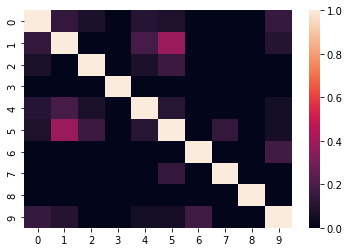

In [21]:
cosine_matrix = np.zeros((10, 10))
vectors = CountVectorizer().fit_transform([t for t in text[10:20]])

for i in range(10):
    for j in range(10):
        cosine_matrix[i][j] = cosine_similarity(vectors[i], vectors[j])
        
document = Document()
save_picture_in_document(cosine_matrix, document)
document.save('data/pictures_1.docx')